# DBSCAN (Density Based Spatial Clustering with Application of Noise)

In [1]:
# importing necessary liberaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/DBSCAN/Wholesale%20customers%20data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
# Channel, Region columns are not useful for analysis so they are not needed 
df.drop(columns=['Channel',	'Region'], inplace=True)

In [4]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [5]:
# descriptive analysis

df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# almost all columns are having outliers
# no missing value

In [7]:
# cheching duplicated
df.duplicated().sum()

0

In [8]:
# check datatype of columns
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### all columns are in proper format

<Axes: >

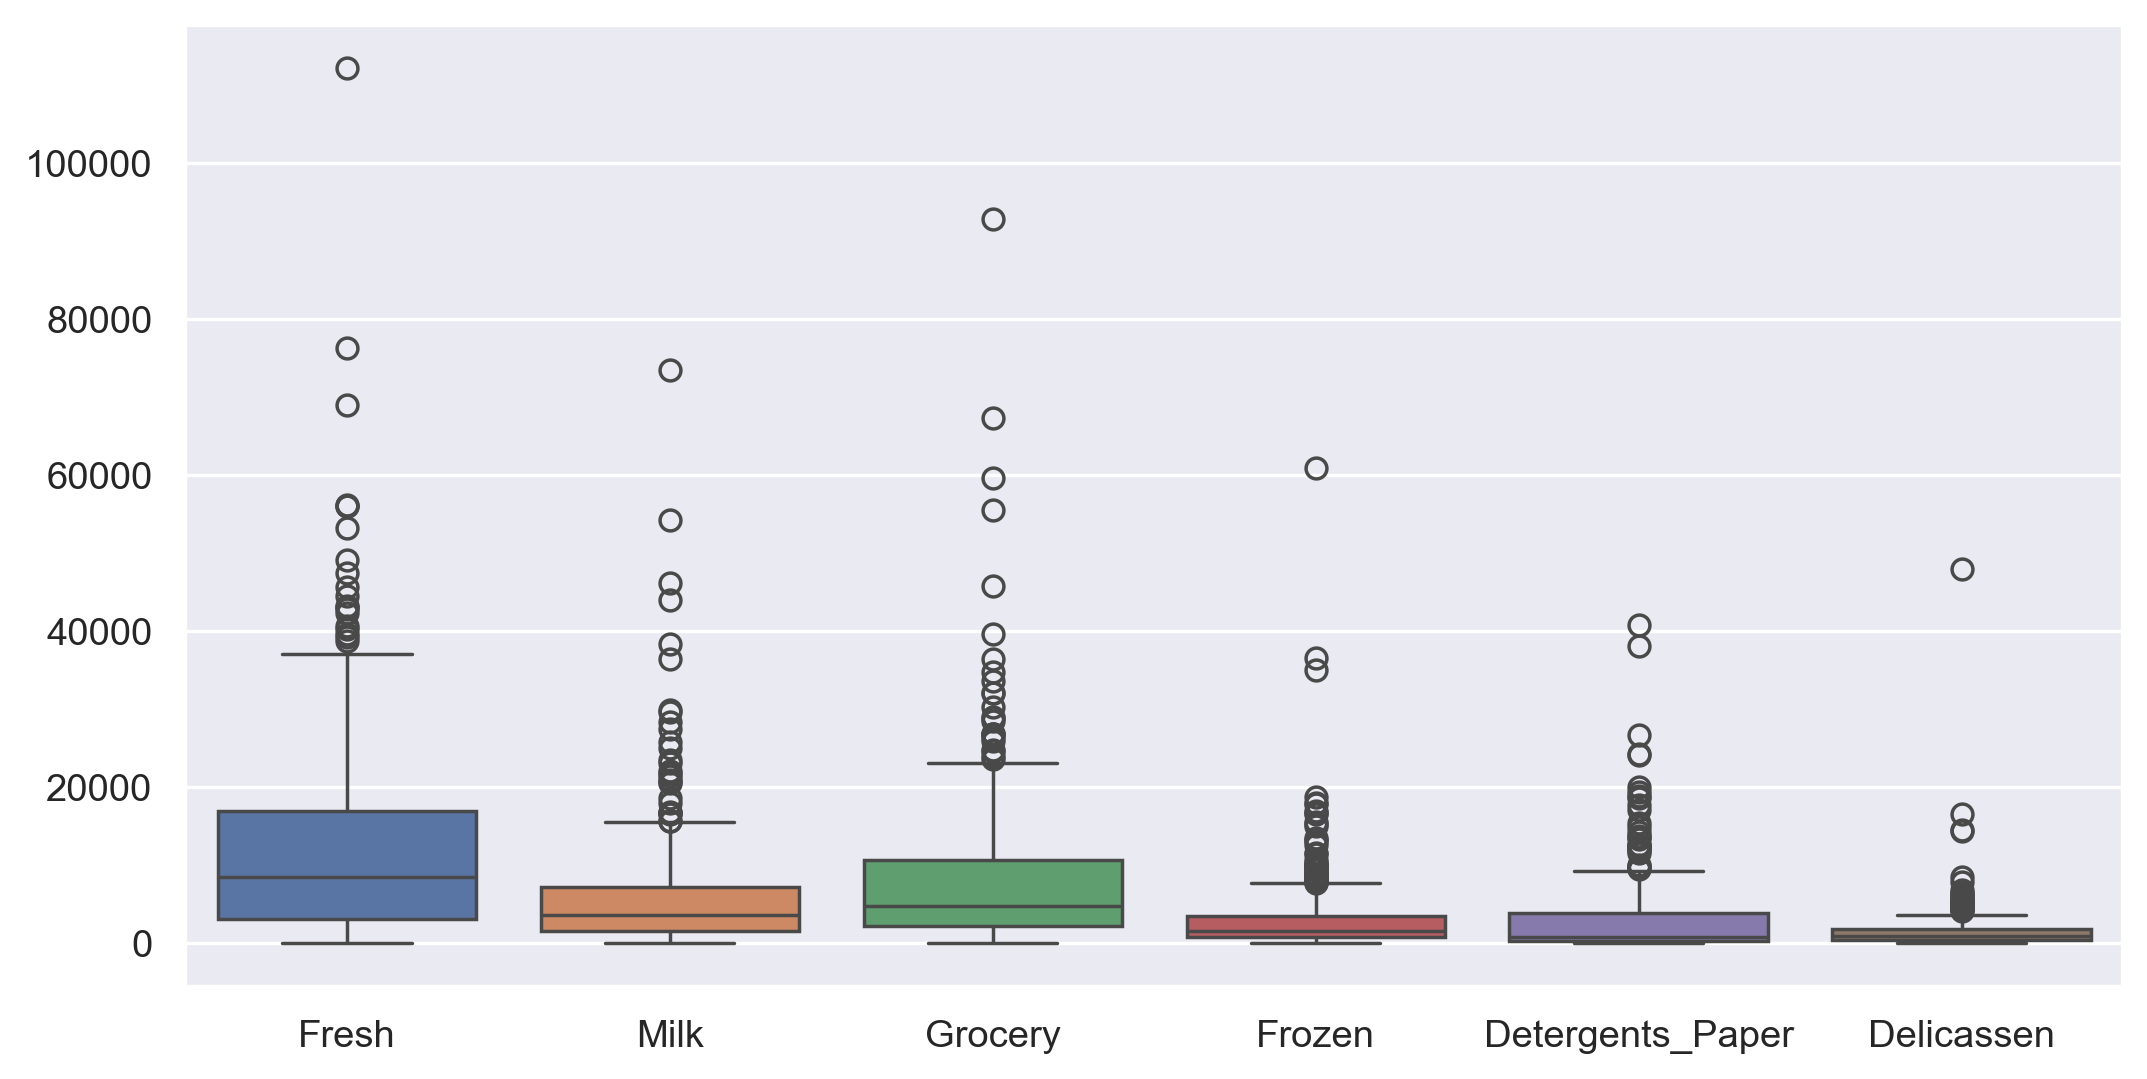

In [9]:
# confirm the outliers
sns.boxplot(df)

### all columns are having outliers at the upper extreme side but I will keep them as it is because DBSCAN detects them automatically

<Axes: xlabel='Fresh', ylabel='Grocery'>

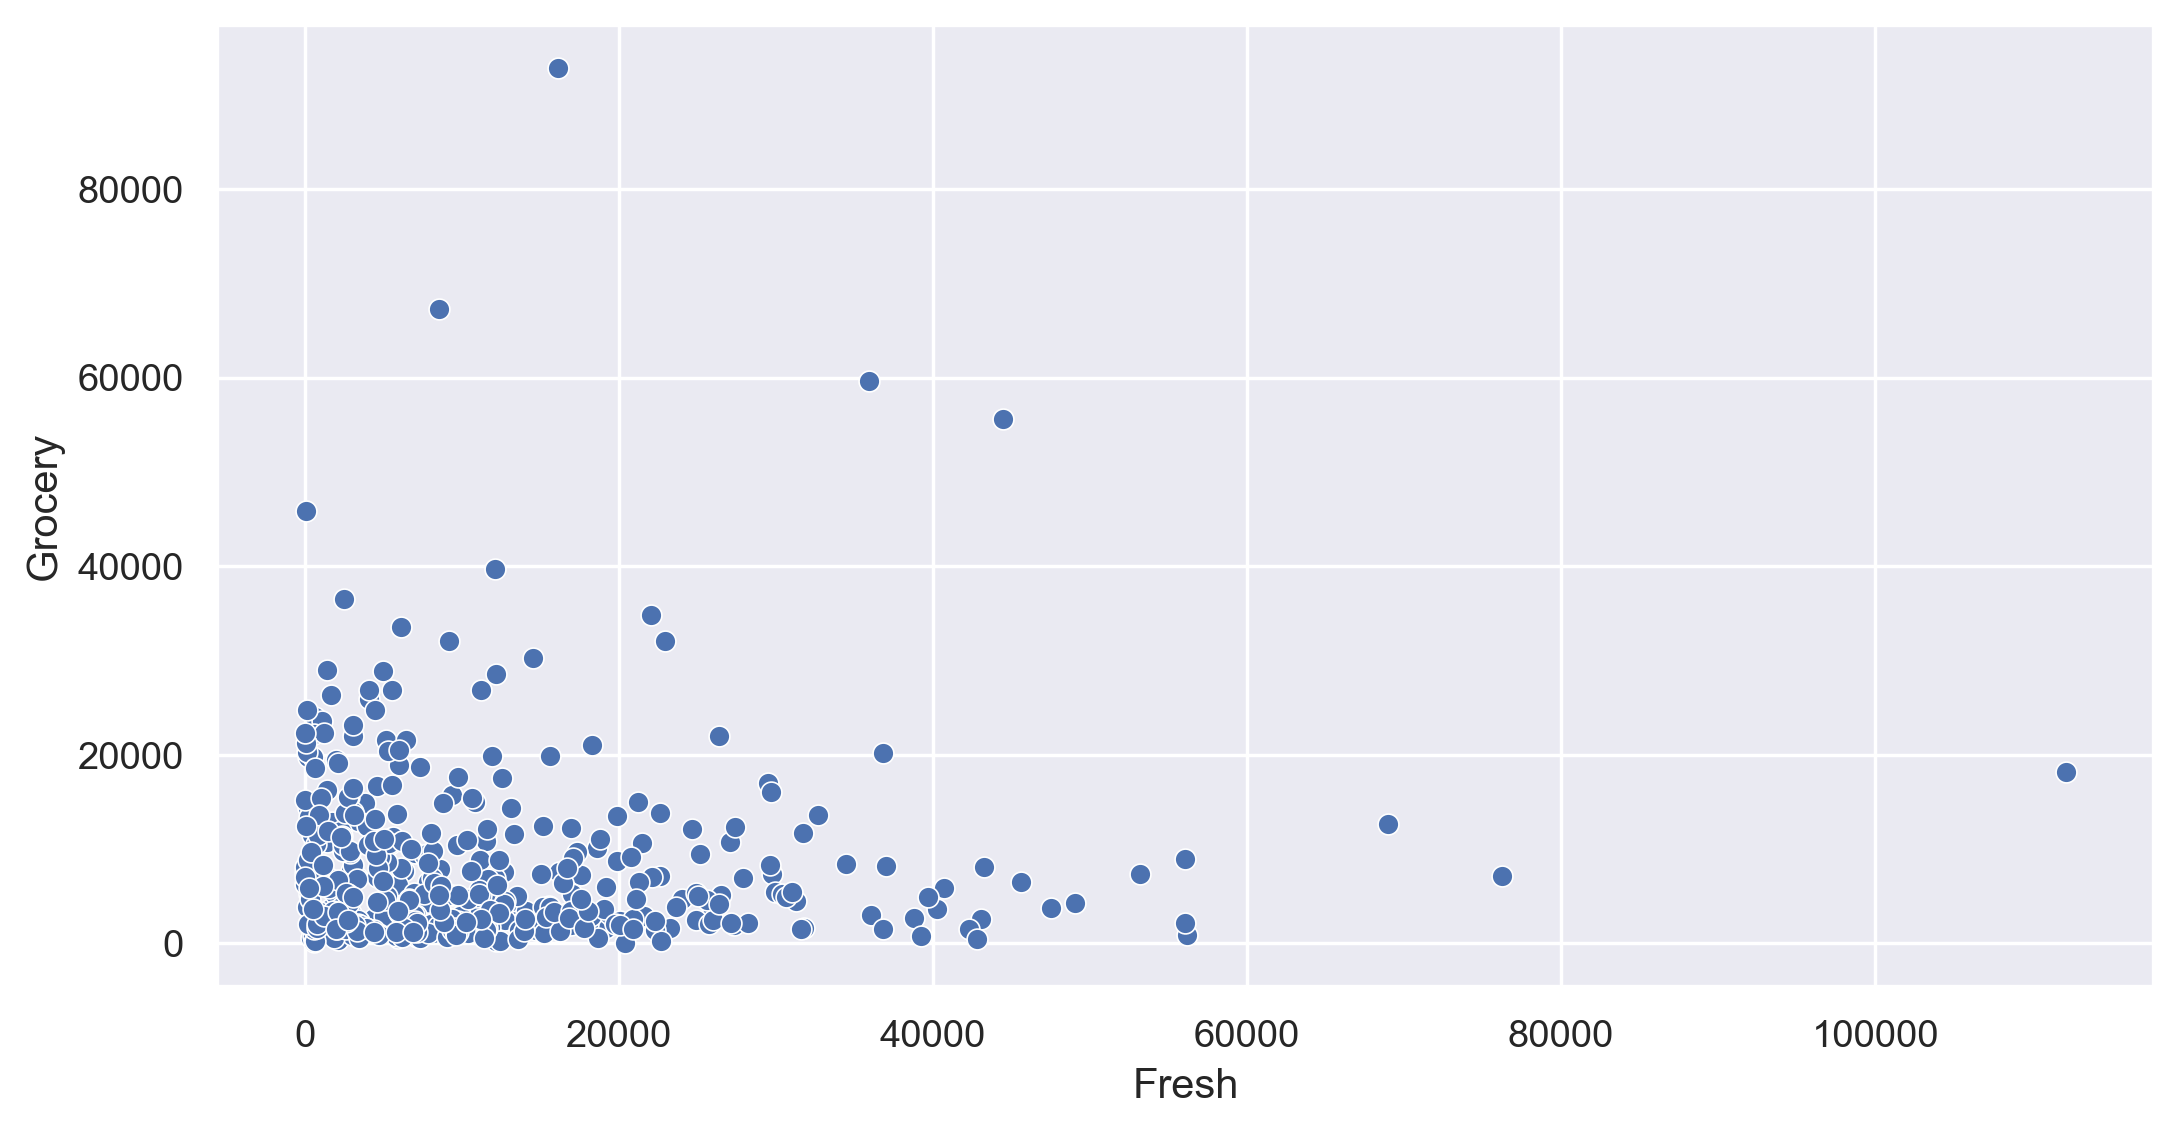

In [10]:
# although there are 6 columns and it's not possible to visualize these columns but see the distribution

sns.scatterplot(data=df, x='Fresh', y='Grocery')

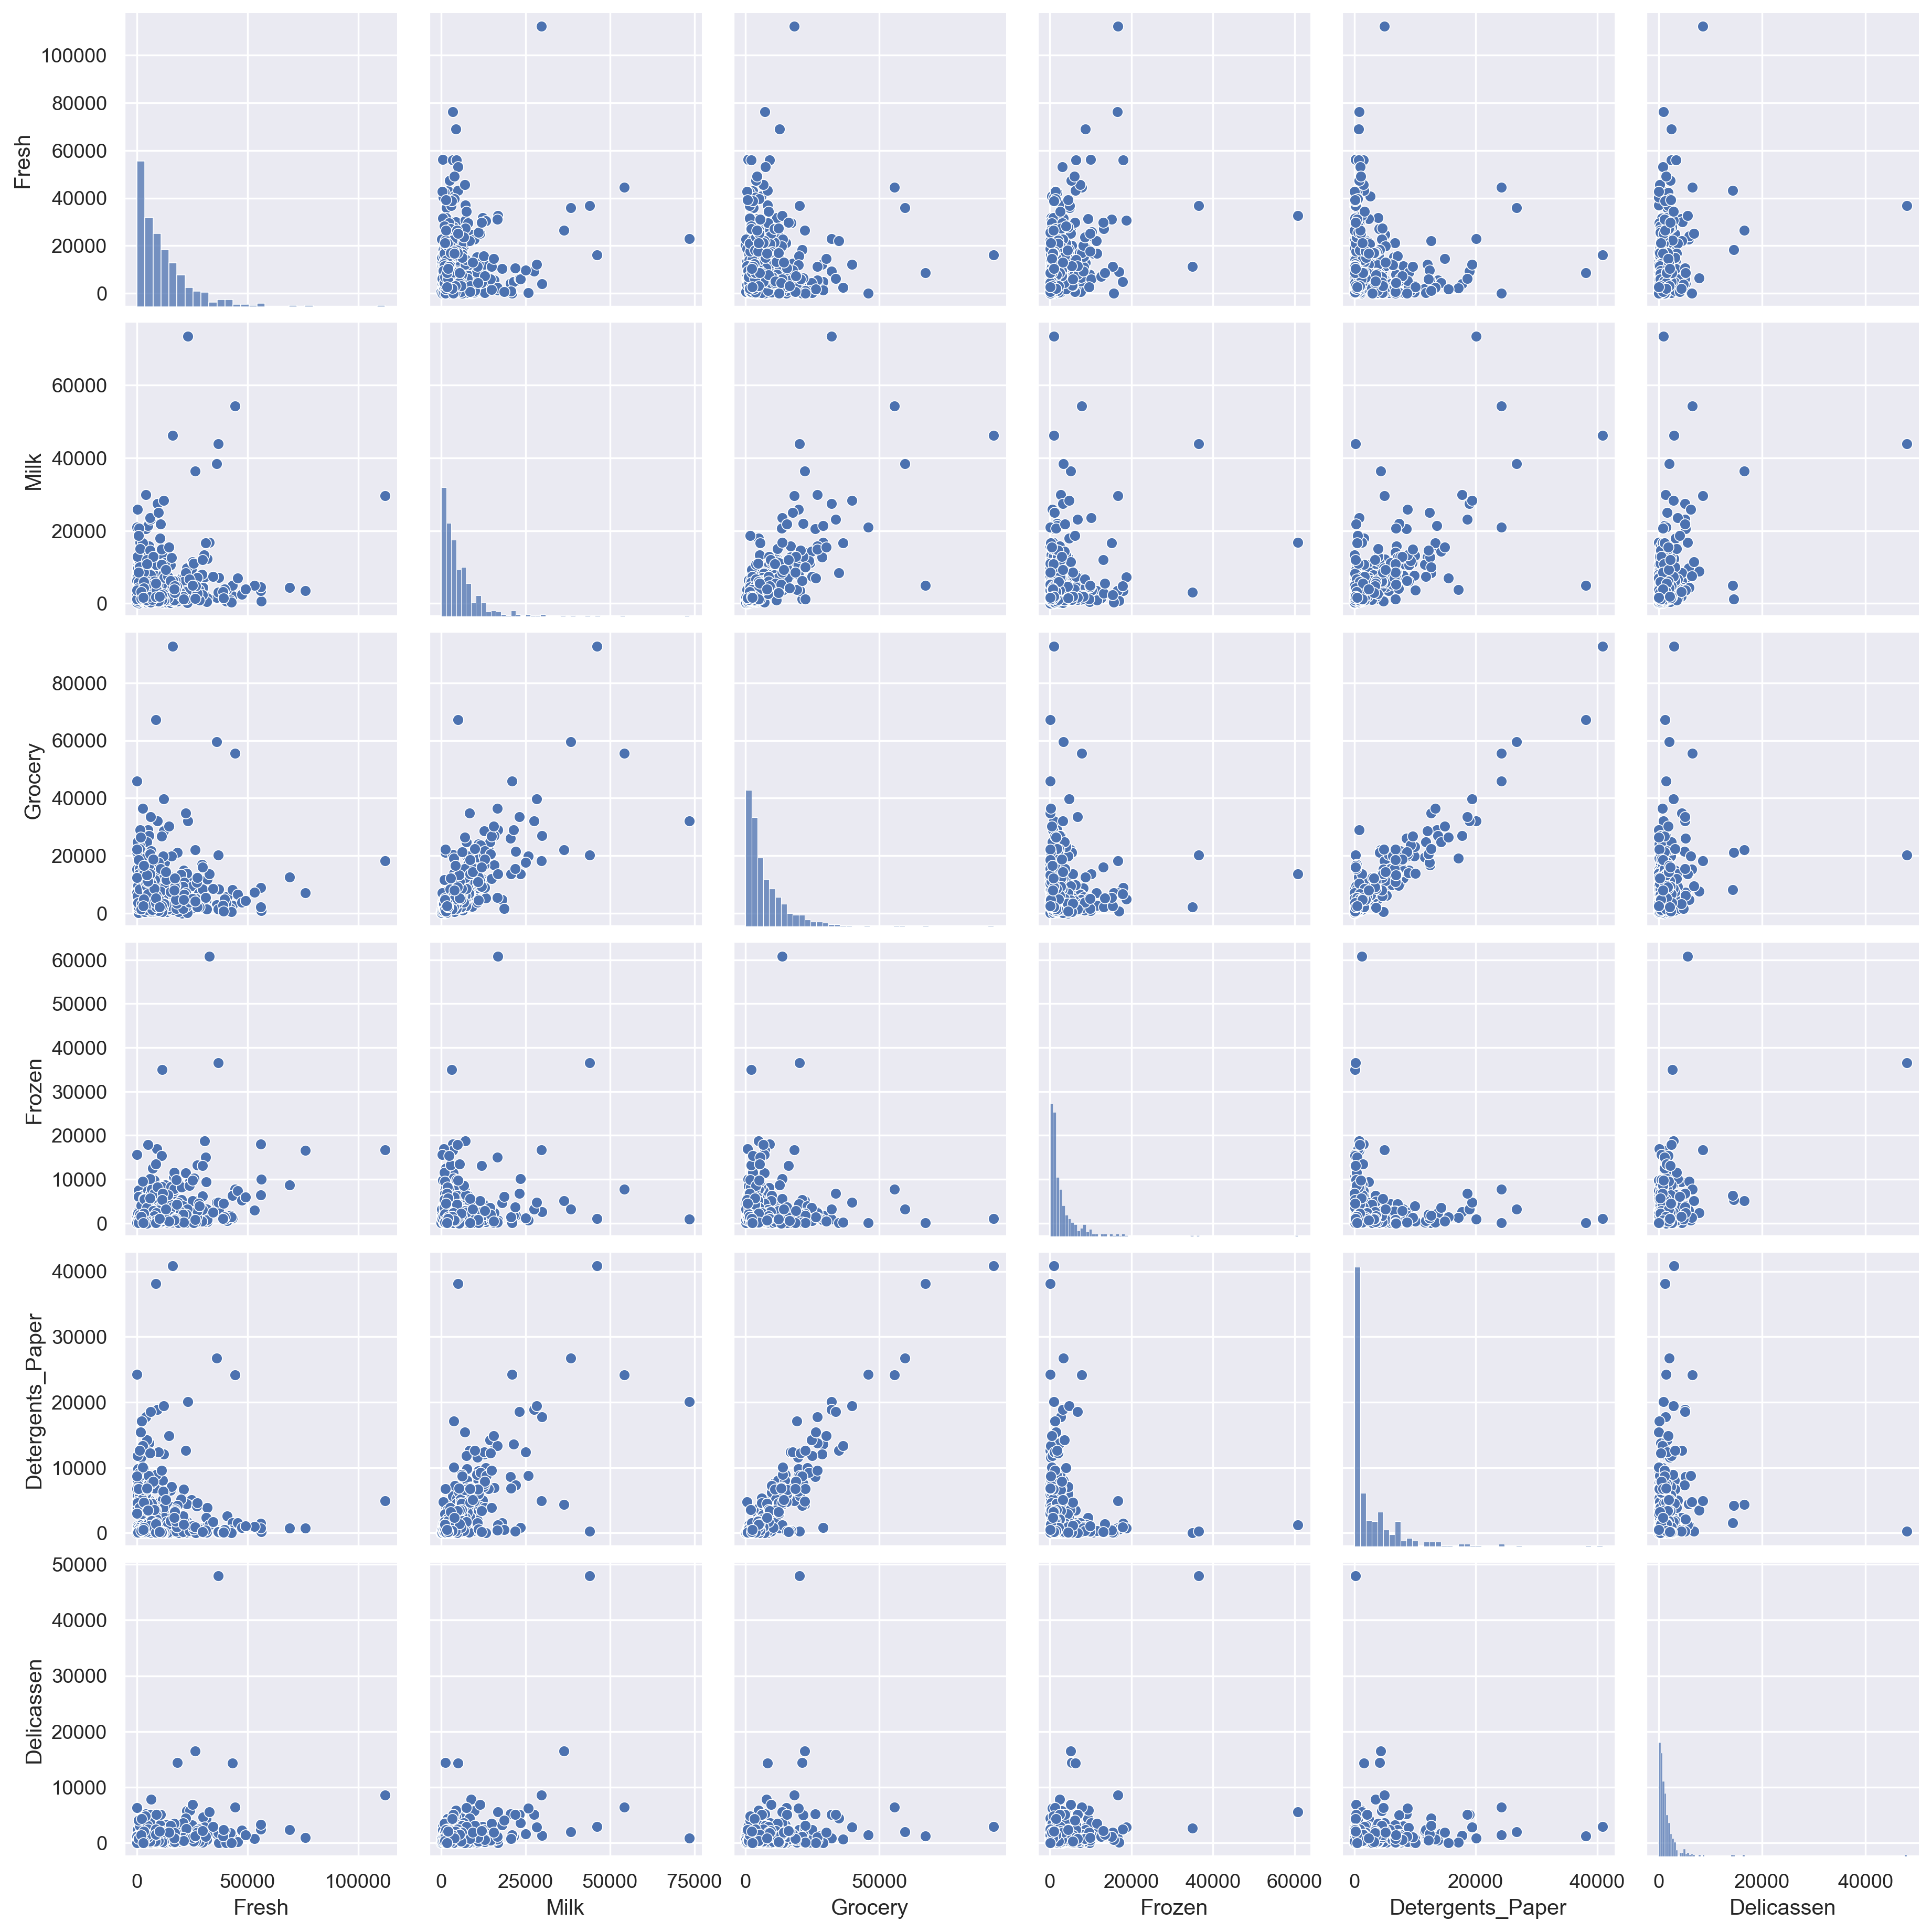

In [11]:
# let's see the distribution

sns.pairplot(df)

# DATA TRANSFORMATION

In [12]:
sc = StandardScaler()
x = sc.fit_transform(df)
x

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [13]:
# just for  my own understanding

pd.DataFrame(x, columns=df.columns)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


# MODEL BUILDING

In [14]:
model1 = DBSCAN(eps=0.5, min_samples=3)
ypred1 = model1.fit_predict(x)
ypred1

array([ 0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,
        4,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0, -1,  1,  0,  0,  0, -1,
        0,  0, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1,  2,  0, -1,  0, -1,
       -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  2,  0, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  3, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,
        0, -1,  0, -1,  0,  0, -1, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1, -1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0

### most of the datapoints are detected as noise datapoints due to random epsilon value
### that's why it's very important to select ideal value of epsilon and min sample

In [15]:
# let's check the accuracy of the model 
silhouette_score(x, ypred1)

-0.07329671681468523

In [16]:
# silhouette score is almost close to 0 that means there is a huge overlaping between clusters because
# I have selected small epsilon value than the actual one

# HYPERPARAMERTER TUNNING

In [17]:
# let's use k-nearest distance plot to find out ideal epsilon value

In [18]:
from sklearn.neighbors import NearestNeighbors
nearest = NearestNeighbors(n_neighbors=3).fit(x)
nearest

NearestNeighbors(n_neighbors=3)

In [19]:
nearest.kneighbors(x)

(array([[0.        , 0.46098501, 0.49746796],
        [0.        , 0.34363739, 0.43048153],
        [0.        , 1.14424502, 1.2507466 ],
        ...,
        [0.        , 0.81088341, 1.05002533],
        [0.        , 0.30388049, 0.31430896],
        [0.        , 0.1811683 , 0.24002891]]),
 array([[  0,   5, 281],
        [  1, 244,  82],
        [  2, 218, 409],
        ...,
        [437,  77, 163],
        [438, 212, 429],
        [439,  34, 299]], dtype=int64))

In [20]:
# it has returned me distances for 3 nearest neighbors calculated for each datapoint and the indeces of the datapoints. let's store them in
# the variables so that I can use them further

distances, index = nearest.kneighbors(x)
distances

array([[0.        , 0.46098501, 0.49746796],
       [0.        , 0.34363739, 0.43048153],
       [0.        , 1.14424502, 1.2507466 ],
       ...,
       [0.        , 0.81088341, 1.05002533],
       [0.        , 0.30388049, 0.31430896],
       [0.        , 0.1811683 , 0.24002891]])

In [21]:
# Sort the distances
second_nearest_dist = np.sort(distances[:, 1])
second_nearest_dist

array([ 0.04438185,  0.04438185,  0.05323769,  0.05323769,  0.05967886,
        0.05967886,  0.06628148,  0.06628148,  0.07562688,  0.07562688,
        0.0906001 ,  0.0906001 ,  0.09573517,  0.09573517,  0.09708669,
        0.09708669,  0.09820424,  0.1138444 ,  0.1138444 ,  0.11524265,
        0.12722269,  0.12765414,  0.12765414,  0.13150813,  0.13150813,
        0.13419437,  0.13419437,  0.13861662,  0.13861662,  0.1417839 ,
        0.14276283,  0.14276283,  0.14585635,  0.15148845,  0.15148845,
        0.15208043,  0.15208043,  0.15230804,  0.15230804,  0.15392478,
        0.15392478,  0.15504455,  0.15504455,  0.15678346,  0.15678346,
        0.15682751,  0.15707717,  0.15707717,  0.15738395,  0.16092861,
        0.16095334,  0.16095334,  0.16251017,  0.16525716,  0.16525716,
        0.16645012,  0.16752299,  0.16869486,  0.16970611,  0.17213295,
        0.17237405,  0.17237405,  0.17322549,  0.17322549,  0.17753441,
        0.17770256,  0.17770256,  0.17835467,  0.17889164,  0.18

Text(0.5, 1.0, 'K-Distance Ploty')

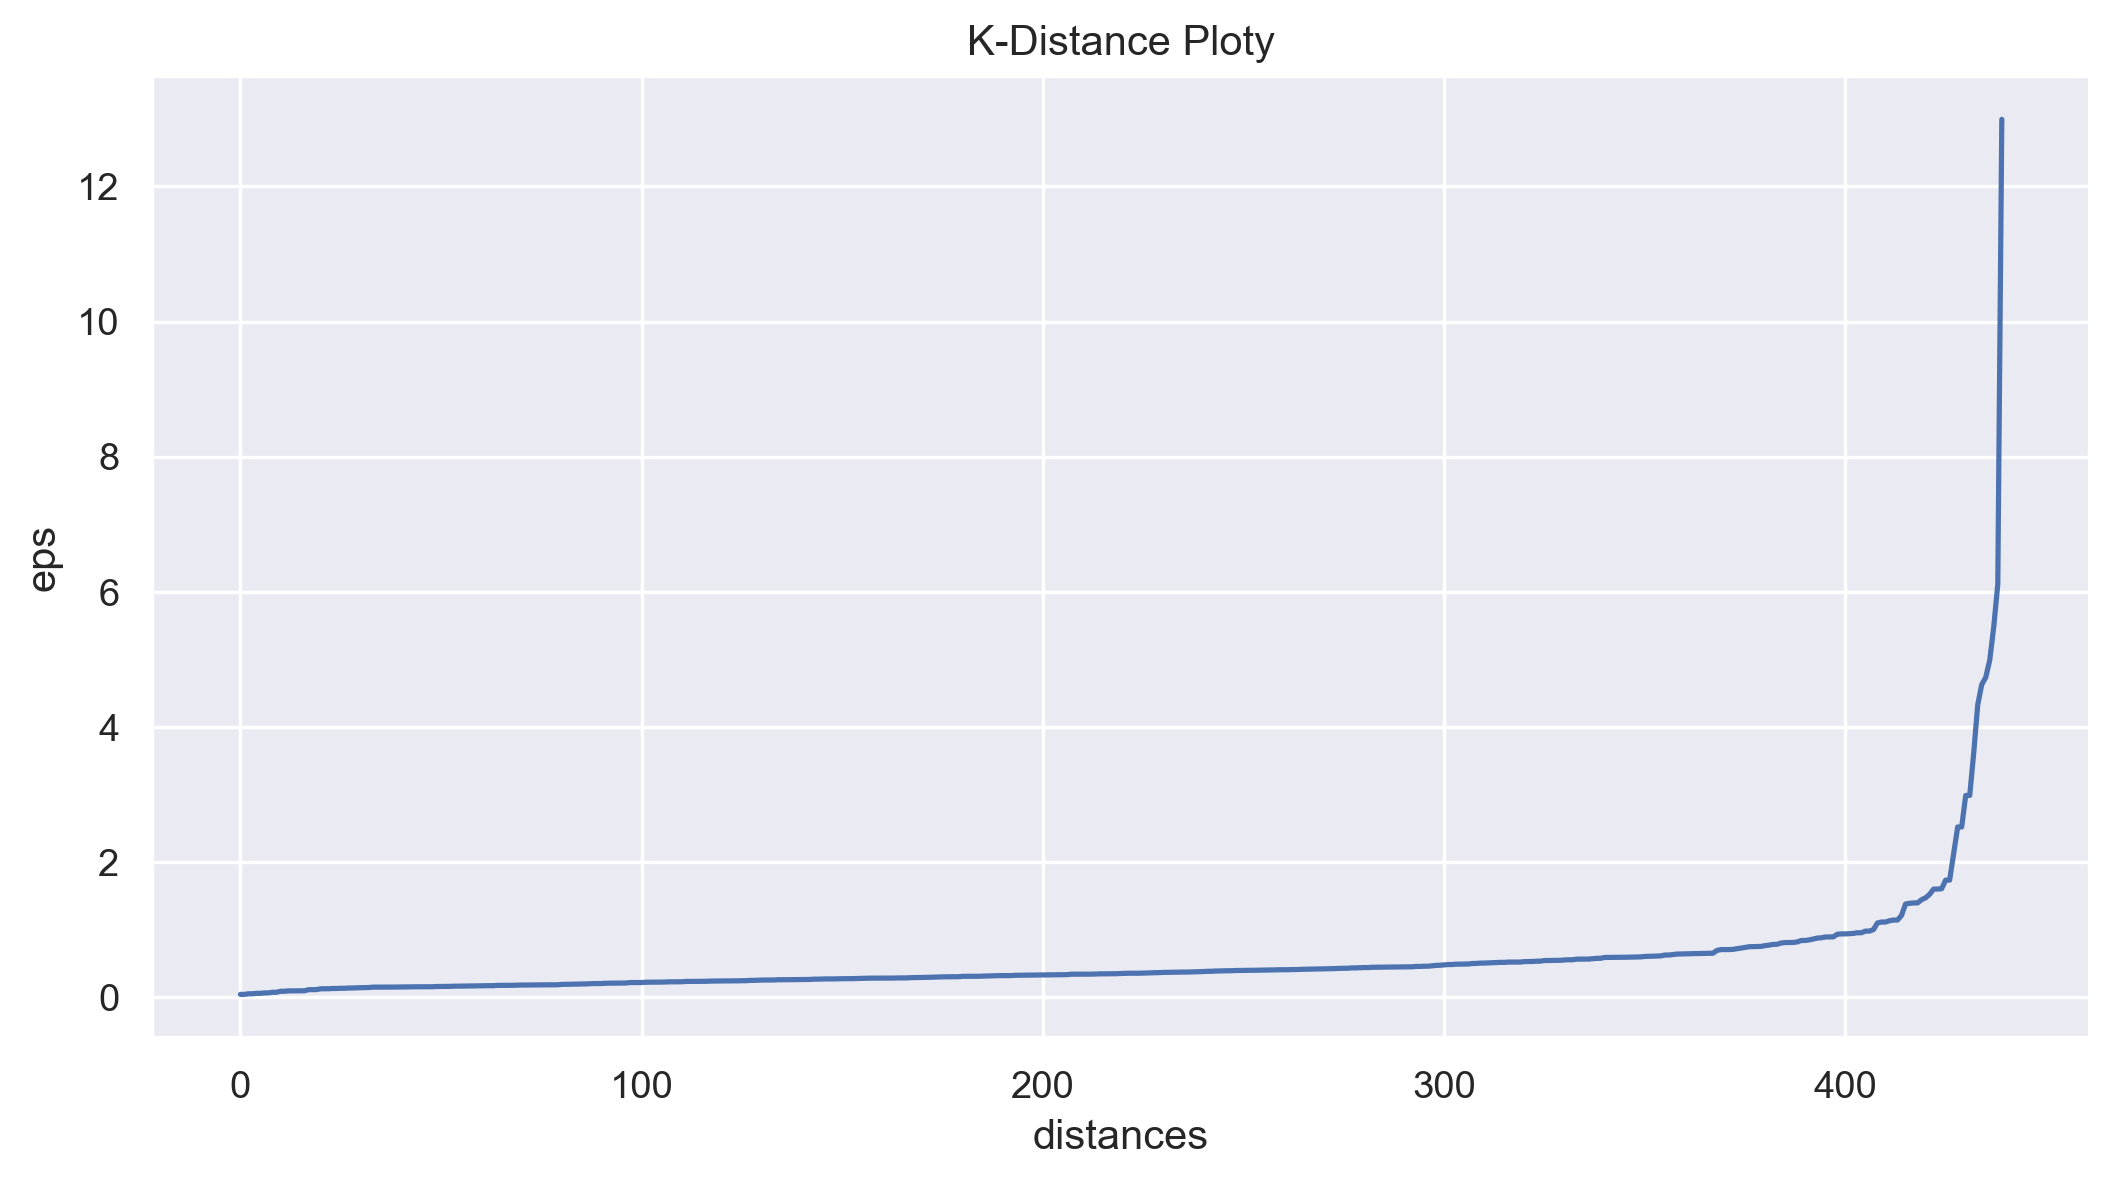

In [22]:
# plot k-distance plot
plt.plot(second_nearest_dist)
plt.xlabel('distances')
plt.ylabel('eps')
plt.title('K-Distance Ploty')

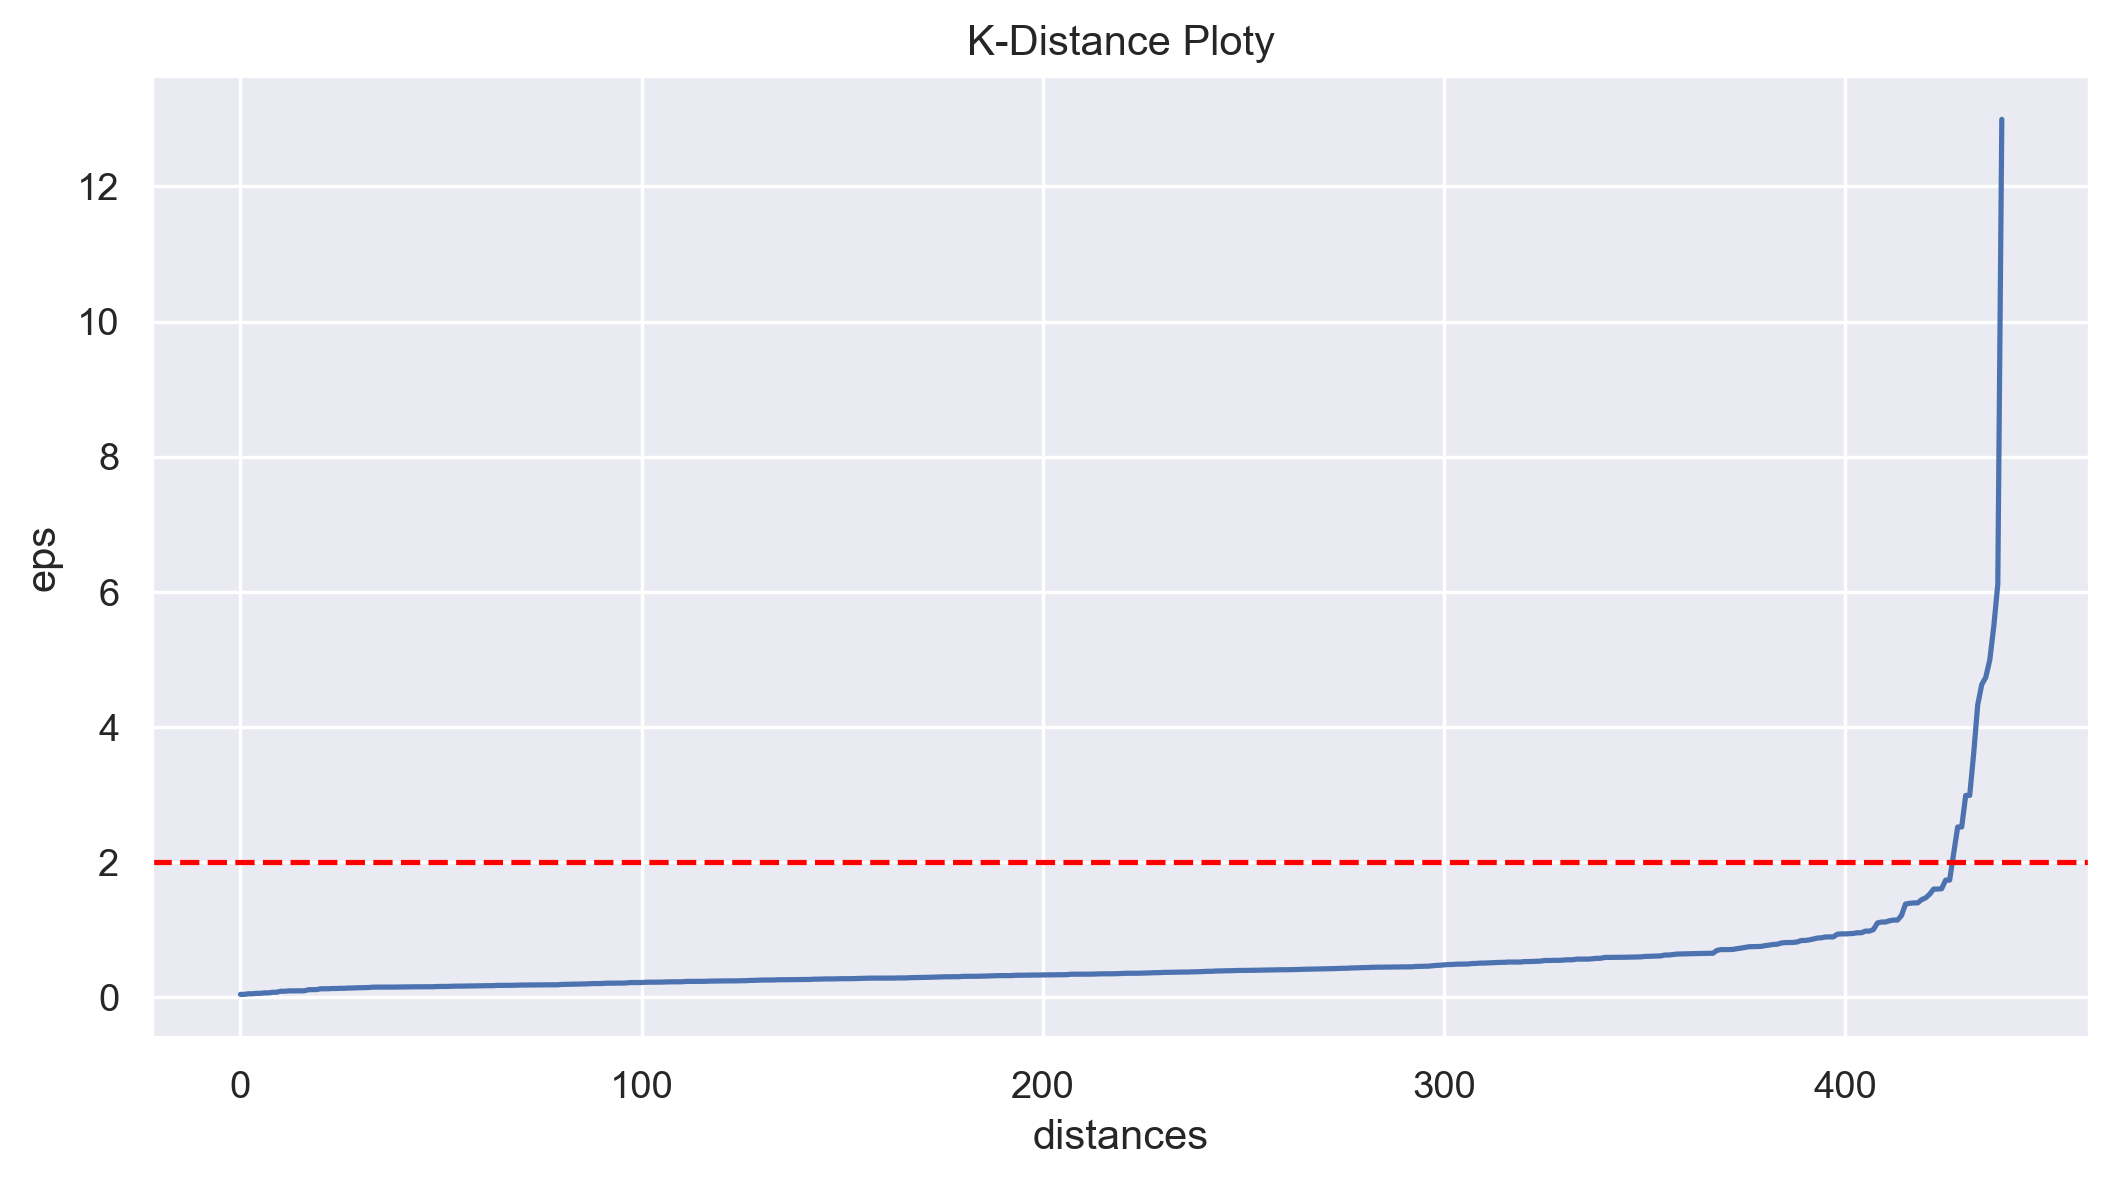

In [32]:
# the value is almost close to 2. let's check bro which is giving the best results
# plot k-distance plot
plt.plot(second_nearest_dist)
plt.xlabel('distances')
plt.ylabel('eps')
plt.title('K-Distance Ploty')
plt.axhline(y=2, color='red', linestyle='--')

# Final Model

In [24]:
model = DBSCAN(eps=2.2, min_samples=3)
ypred = model.fit_predict(x)
ypred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [25]:
np.unique(ypred)

array([-1,  0], dtype=int64)

#### '-1' label represents the outliers
####  DBSCAN has created only one cluster and all the datapoint of this cluster has represented by '0' label

# MODEL EVALUATION

In [26]:
# let's check the accuracy of the model
accuracy = silhouette_score(x, ypred)
accuracy

0.7542161758333567

### I checked 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4 for epsilon(eps) and 2.2 is giving the best result.
### so I need to ckeck some closest values to get the best accuracy

# ANALYSIS OF CLUSTER

In [27]:
# created a new column and stored the labels for the datapoints
df['Cluster'] = ypred
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [28]:
df.groupby('Cluster').agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
-1,34081.083333,29455.666667,34378.750000,14931.333333,13874.166667,10307.500000
0,11381.210280,5132.918224,7210.320093,2739.425234,2573.287383,1278.628505


In [29]:
df['Cluster'].value_counts()

Cluster
 0    428
-1     12
Name: count, dtype: int64

# analysis:

### Most of the shops (482 shops) whose daily purchasing of daily grocery is almost similar they are creating one group
### so I can say almost all of these shops are spending similary amount of money for purchasing products